In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt

## Antecedents & Consequents

In [2]:
# Antecedents (Inputs)
fitness_level = ctrl.Antecedent(np.arange(0, 101, 1), 'fitness_level')
energy_level = ctrl.Antecedent(np.arange(0, 101, 1), 'energy_level')
goal = ctrl.Antecedent(np.arange(0, 101, 1), 'goal') 
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
weight_status = ctrl.Antecedent(np.arange(0, 101, 1), 'weight_status')

# Consequents (Consequent)
intensity = ctrl.Consequent(np.arange(0, 101, 1), 'intensity')
duration = ctrl.Consequent(np.arange(0, 121, 1), 'duration')

## Membership functions

In [3]:
# Membership functions for Fitness Level 
fitness_level['beginner'] = fuzz.trimf(fitness_level.universe, [0, 0, 50])
fitness_level['intermediate'] = fuzz.trimf(fitness_level.universe, [20, 50, 80])
fitness_level['advanced'] = fuzz.trimf(fitness_level.universe, [50, 100, 100])

# Membership functions for Energy Level
energy_level['low'] = fuzz.trimf(energy_level.universe, [0, 0, 50])
energy_level['medium'] = fuzz.trimf(energy_level.universe, [20, 50, 80])
energy_level['high'] = fuzz.trimf(energy_level.universe, [50, 100, 100])

# Membership functions for Goal
goal['weight_loss'] = fuzz.trimf(goal.universe, [0, 0, 40])
goal['general'] = fuzz.trimf(goal.universe, [25, 50, 75])
goal['muscle_gain'] = fuzz.trimf(goal.universe, [60, 100, 100])

# Membership functions for Age
age['young'] = fuzz.trapmf(age.universe, [0, 0, 18, 35])
age['middle_aged'] = fuzz.trimf(age.universe, [30, 50, 65])
age['old'] = fuzz.trapmf(age.universe, [60, 80, 100, 100])

# Membership functions for Weight Status
weight_status['underweight'] = fuzz.trimf(weight_status.universe, [0, 0, 30])
weight_status['normal'] = fuzz.trimf(weight_status.universe, [20, 50, 80])
weight_status['overweight'] = fuzz.trimf(weight_status.universe, [70, 100, 100])

# Membership functions for Intensity
intensity['low'] = fuzz.trimf(intensity.universe, [0, 0, 40])
intensity['medium'] = fuzz.trimf(intensity.universe, [30, 50, 70])
intensity['high'] = fuzz.trimf(intensity.universe, [60, 100, 100])

# Membership functions for Duration
duration['short'] = fuzz.trimf(duration.universe, [0, 0, 45])
duration['medium'] = fuzz.trimf(duration.universe, [30, 60, 90])
duration['long'] = fuzz.trimf(duration.universe, [75, 120, 120])

#### Visualize Membership Functions

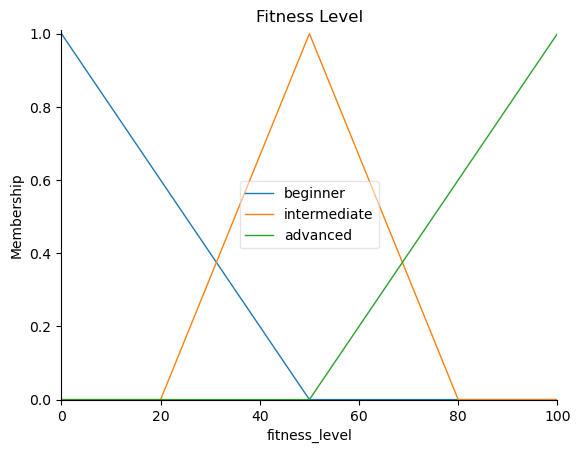

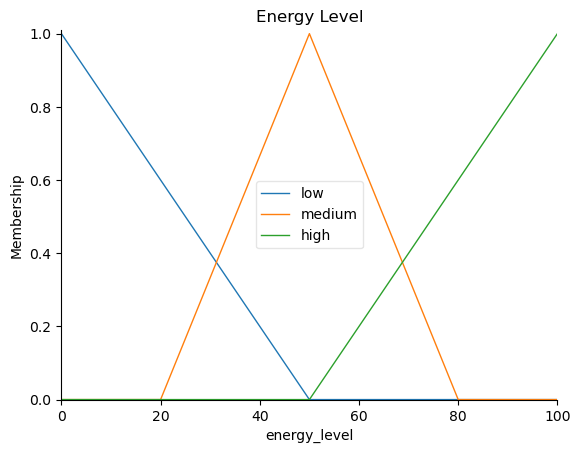

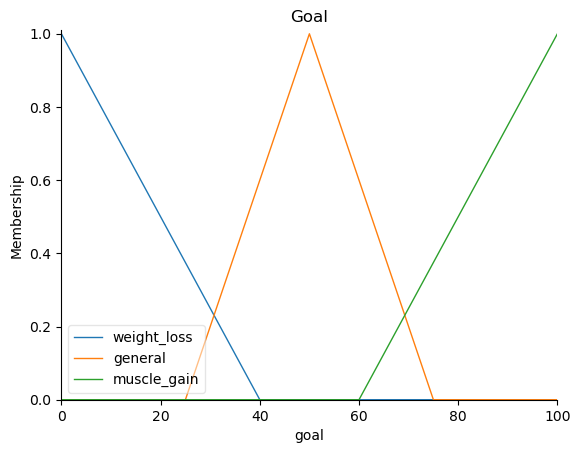

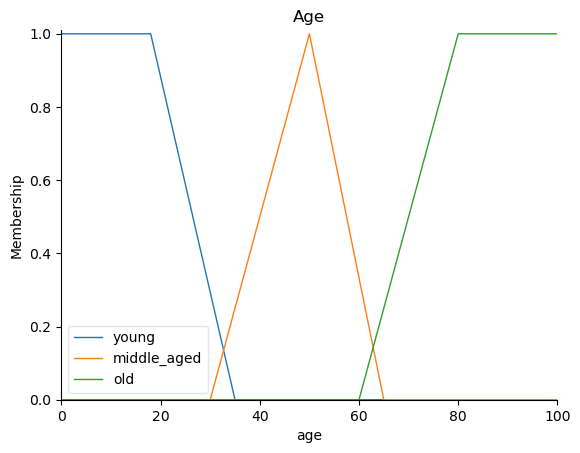

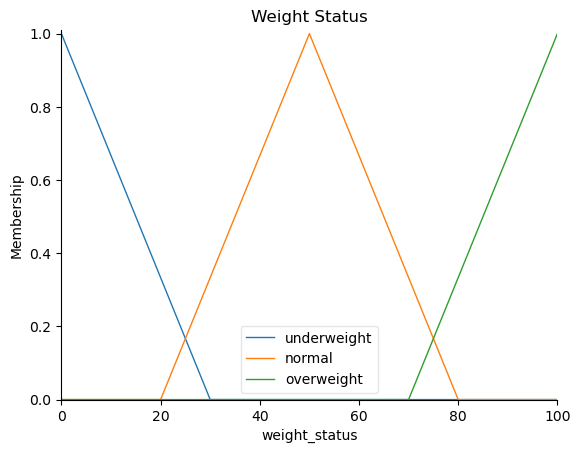

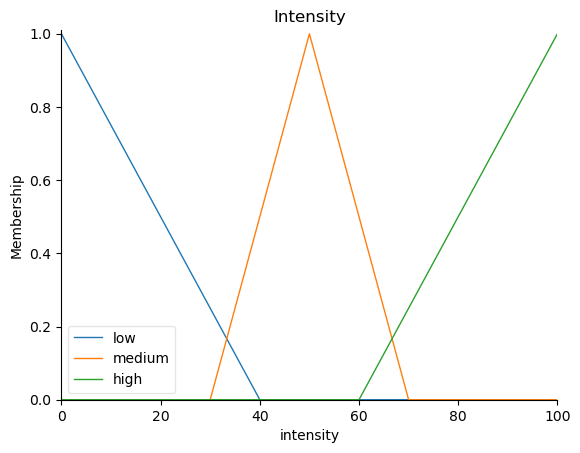

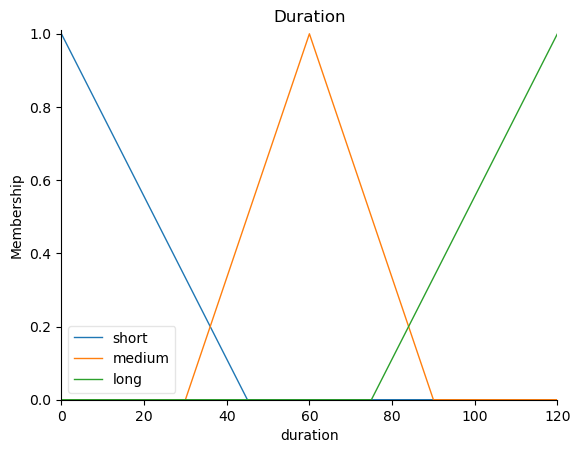

In [14]:
fitness_level.view()
plt.title('Fitness Level')

energy_level.view()
plt.title('Energy Level')

goal.view()
plt.title('Goal')

age.view()
plt.title('Age')

weight_status.view()
plt.title('Weight Status')

intensity.view()
plt.title('Intensity')

duration.view()
plt.title('Duration')

%matplotlib inline

# Fuzzy Rules
- The rules are defined in general terms to be able to handle different situations.
- The rules are structured based on common sense scenarios and medical and sports physiology theories.


### Rules based primarily on Fitness and Energy

In [5]:
rule1 = ctrl.Rule(fitness_level['beginner'] & energy_level['low'],
                  [intensity['low'], duration['short']])
rule2 = ctrl.Rule(fitness_level['beginner'] & energy_level['medium'],
                  [intensity['low'], duration['medium']])
rule3 = ctrl.Rule(fitness_level['beginner'] & energy_level['high'],
                  [intensity['medium'], duration['medium']])

rule4 = ctrl.Rule(fitness_level['intermediate'] & energy_level['low'],
                  [intensity['medium'], duration['short']])
rule5 = ctrl.Rule(fitness_level['intermediate'] & energy_level['medium'],
                  [intensity['medium'], duration['medium']])
rule6 = ctrl.Rule(fitness_level['intermediate'] & energy_level['high'],
                  [intensity['high'], duration['medium']])

rule7 = ctrl.Rule(fitness_level['advanced'] & energy_level['low'],
                  [intensity['medium'], duration['medium']]) 
rule8 = ctrl.Rule(fitness_level['advanced'] & energy_level['medium'],
                  [intensity['high'], duration['medium']])
rule9 = ctrl.Rule(fitness_level['advanced'] & energy_level['high'],
                  [intensity['high'], duration['long']])


### Rules considering Goal

In [6]:
# Weight Loss Goal
rule10 = ctrl.Rule(goal['weight_loss'] & fitness_level['beginner'],
                   [intensity['low'], duration['medium']]) 
rule11 = ctrl.Rule(goal['weight_loss'] & fitness_level['intermediate'] & energy_level['low'],
                   [intensity['medium'], duration['medium']])
rule12 = ctrl.Rule(goal['weight_loss'] & fitness_level['intermediate'] & energy_level['high'],
                   [intensity['medium'], duration['long']])  
rule13 = ctrl.Rule(goal['weight_loss'] & fitness_level['advanced'] & energy_level['medium'],
                   [intensity['high'], duration['long']])
rule14 = ctrl.Rule(goal['weight_loss'] & fitness_level['advanced'] & energy_level['high'],
                   [intensity['high'], duration['long']])  

# Muscle Gain Goal
rule15 = ctrl.Rule(goal['muscle_gain'] & fitness_level['beginner'],
                   [intensity['low'], duration['short']])  
rule16 = ctrl.Rule(goal['muscle_gain'] & fitness_level['intermediate'] & energy_level['medium'],
                   [intensity['high'], duration['medium']])  
rule17 = ctrl.Rule(goal['muscle_gain'] & fitness_level['intermediate'] & energy_level['high'],
                   [intensity['high'], duration['medium']]) 
rule18 = ctrl.Rule(goal['muscle_gain'] & fitness_level['advanced'] & energy_level['medium'],
                   [intensity['high'], duration['medium']])
rule19 = ctrl.Rule(goal['muscle_gain'] & fitness_level['advanced'] & energy_level['high'],
                   [intensity['high'],
                    duration['medium']])  

# General Fitness Goal
rule20 = ctrl.Rule(goal['general'] & fitness_level['beginner'],
                   [intensity['low'], duration['short']])
rule21 = ctrl.Rule(goal['general'] & fitness_level['intermediate'],
                   [intensity['medium'], duration['medium']]) 
rule22 = ctrl.Rule(goal['general'] & fitness_level['advanced'],
                   [intensity['high'], duration['medium']])


### Rules considering Age


In [7]:
# Impact of Age, especially on 'old'
rule23 = ctrl.Rule(age['old'] & fitness_level['beginner'],
                   [intensity['low'], duration['short']]) 
rule24 = ctrl.Rule(age['old'] & fitness_level['intermediate'],
                   [intensity['low'], duration['medium']])
rule25 = ctrl.Rule(age['old'] & fitness_level['advanced'],
                   [intensity['medium'], duration['medium']]) 

# Age modifying goal-based rules
rule26 = ctrl.Rule(age['old'] & goal['weight_loss'],
                   [intensity['low'], duration['medium']]) 
rule27 = ctrl.Rule(age['old'] & goal['muscle_gain'],
                   [intensity['medium'], duration['short']])

# Young people might push harder
rule28 = ctrl.Rule(age['young'] & goal['muscle_gain'] & fitness_level['intermediate'] & energy_level['high'],
                   [intensity['high'], duration['long']]) 
rule29 = ctrl.Rule(age['young'] & goal['weight_loss'] & fitness_level['advanced'] & energy_level['high'],
                   [intensity['high'], duration['long']]) 


### Rules considering Weight Status

In [8]:
# Underweight status (often focus on muscle gain or general health)
rule30 = ctrl.Rule(weight_status['underweight'] & goal['weight_loss'], 
                   [intensity['low'], duration['short']])  
rule31 = ctrl.Rule(weight_status['underweight'] & goal['muscle_gain'] & fitness_level['beginner'],
                   [intensity['low'], duration['medium']]) 
rule32 = ctrl.Rule(weight_status['underweight'] & goal['muscle_gain'] & fitness_level['intermediate'],
                   [intensity['medium'], duration['medium']])
rule33 = ctrl.Rule(weight_status['underweight'] & goal['muscle_gain'] & fitness_level['advanced'],
                   [intensity['high'], duration['medium']])  

# Overweight status (often focus on weight loss or general health, need caution)
rule34 = ctrl.Rule(weight_status['overweight'] & fitness_level['beginner'],
                   [intensity['low'], duration['medium']])  
rule35 = ctrl.Rule(
    weight_status['overweight'] & goal['weight_loss'] & fitness_level['intermediate'] & energy_level['low'],
    [intensity['medium'], duration['medium']])  
rule36 = ctrl.Rule(
    weight_status['overweight'] & goal['weight_loss'] & fitness_level['intermediate'] & energy_level['high'],
    [intensity['medium'], duration['long']])  
rule37 = ctrl.Rule(weight_status['overweight'] & goal['weight_loss'] & fitness_level['advanced'],
                   [intensity['high'], duration['long']])  

# Normal weight status
# Generally, normal weight allows applying the core fitness/energy/goal rules more directly.

rule38 = ctrl.Rule(weight_status['normal'] & goal['general'] & fitness_level['intermediate'] & energy_level['medium'],
                   [intensity['medium'], duration['medium']])  
rule39 = ctrl.Rule(weight_status['normal'] & goal['muscle_gain'] & fitness_level['intermediate'],
                   [intensity['high'], duration['medium']])  
rule40 = ctrl.Rule(weight_status['normal'] & goal['weight_loss'] & fitness_level['intermediate'],
                   [intensity['medium'], duration['long']])  


### Rules for specific edge cases or combinations

In [9]:
# High Fitness, Low Energy - regardless of goal/age/weight (energy is limiting)
rule41 = ctrl.Rule(fitness_level['advanced'] & energy_level['low'],
                   [intensity['medium'], duration['medium']])

# Low Fitness, High Energy - potentially can do more than expected for fitness level
rule42 = ctrl.Rule(
    fitness_level['beginner'] & energy_level['high'] & age['young'] & weight_status['normal'] & goal['general'],
    [intensity['medium'], duration['medium']])


## Control System & Defuzzification

In [10]:
# Combine rules into a Control System
exercise_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30,
    rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40,
    rule41, rule42
])

# Create a Control System Simulation
exercise_simulation = ctrl.ControlSystemSimulation(exercise_ctrl)

## Fuzzy Inference 

- create a Simulation
- define TestCases
- Test & Validation

#### Simulation

In [11]:
# Create a Control System Simulation
exercise_simulation = ctrl.ControlSystemSimulation(exercise_ctrl)

#### TestCases

In [12]:
# Define a list of different input scenarios
test_cases = [
    {
        'name': "Case 1: Beginner, Low Energy, General, Young, Normal",
        'inputs': {'fitness_level': 15, 'energy_level': 20, 'goal': 50, 'age': 22, 'weight_status': 50}
    },
    {
        'name': "Case 2: Advanced, High Energy, Muscle Gain, Young, Normal",
        'inputs': {'fitness_level': 90, 'energy_level': 85, 'goal': 95, 'age': 28, 'weight_status': 60}
    },
    {
        'name': "Case 5: Intermediate, Low Energy, Weight Loss, Young, Overweight",
        'inputs': {'fitness_level': 50, 'energy_level': 30, 'goal': 10, 'age': 30, 'weight_status': 90}
    },
    {
        'name': "Case 3: Intermediate, Medium Energy, Weight Loss, Middle-aged, Overweight",
        'inputs': {'fitness_level': 55, 'energy_level': 50, 'goal': 0, 'age': 50, 'weight_status': 90}
    },
    {
        'name': "Case 4: Beginner, High Energy, General, Middle-aged, Underweight",
        'inputs': {'fitness_level': 20, 'energy_level': 80, 'goal': 50, 'age': 40, 'weight_status': 20}
    },
    {
        'name': "Case 6: Intermediate, Low Energy, General, Old, Normal",
        'inputs': {'fitness_level': 50, 'energy_level': 25, 'goal': 50, 'age': 75, 'weight_status': 55}
    },
    {
        'name': "Case 6: Intermediate, High Energy, Muscle Gain, Old, Normal",
        'inputs': {'fitness_level': 60, 'energy_level': 80, 'goal': 80, 'age': 65, 'weight_status': 70}
    },    
]

#### Test & Evalution & Visualize

Multiple Test Cases for Validation

=================== Test Case 1: Case 1: Beginner, Low Energy, General, Young, Normal ===================
Inputs:
  fitness_level: 15
  energy_level: 20
  goal: 50
  age: 22
  weight_status: 50

Outputs:
  Recommended Intensity: 14.26 / 100%
  Recommended Duration: 16.04 / 120 minutes


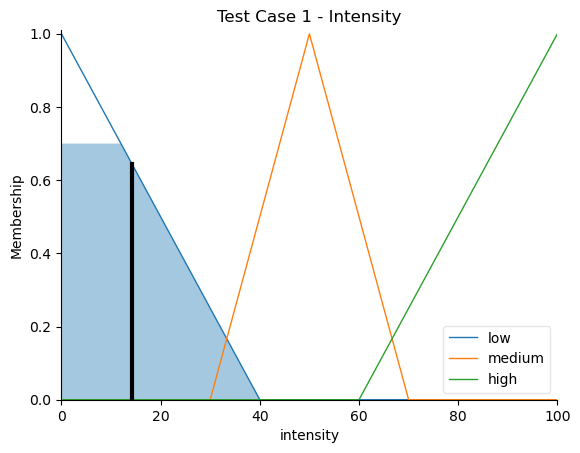

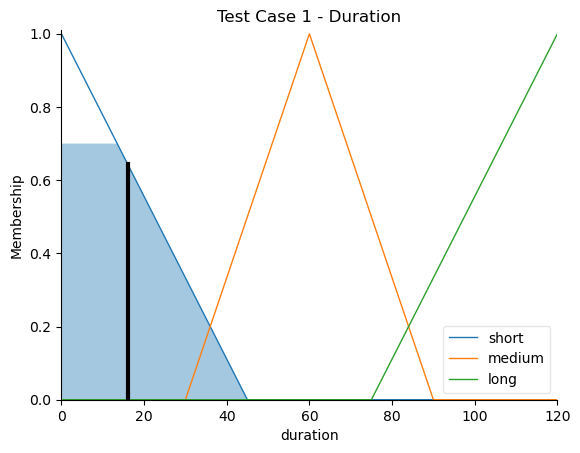


=================== Test Case 2: Case 2: Advanced, High Energy, Muscle Gain, Young, Normal ===================
Inputs:
  fitness_level: 90
  energy_level: 85
  goal: 95
  age: 28
  weight_status: 60

Outputs:
  Recommended Intensity: 85.74 / 100%
  Recommended Duration: 78.71 / 120 minutes


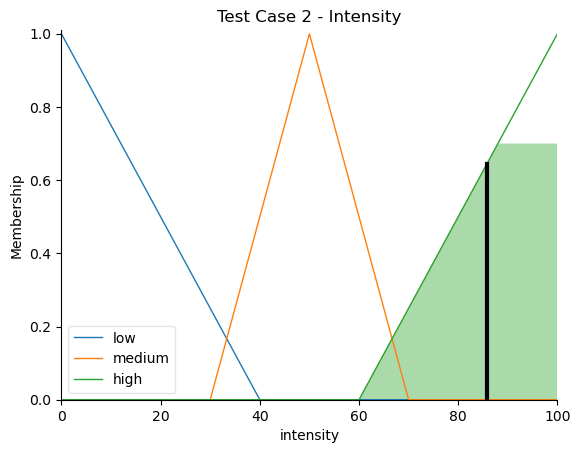

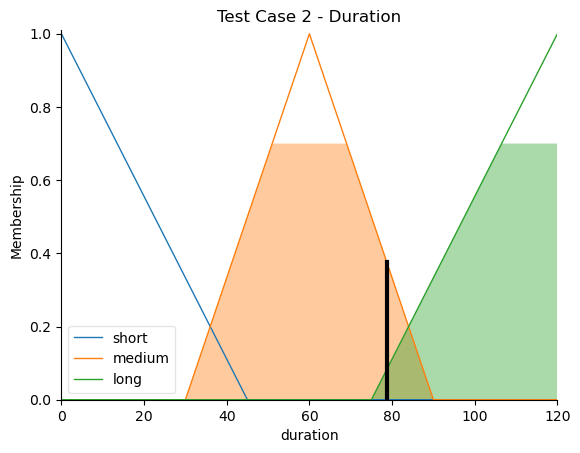


=================== Test Case 3: Case 5: Intermediate, Low Energy, Weight Loss, Young, Overweight ===================
Inputs:
  fitness_level: 50
  energy_level: 30
  goal: 10
  age: 30
  weight_status: 90

Outputs:
  Recommended Intensity: 50.00 / 100%
  Recommended Duration: 42.40 / 120 minutes


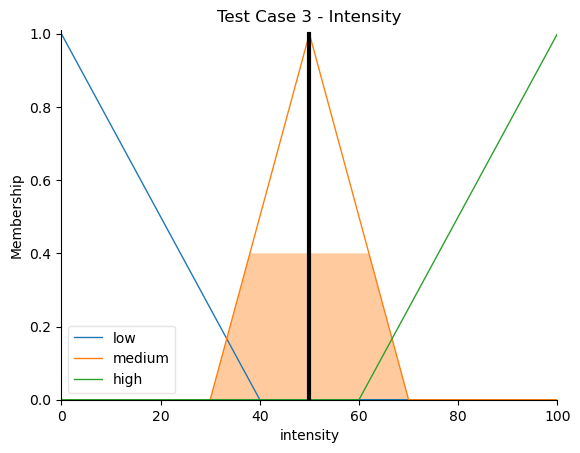

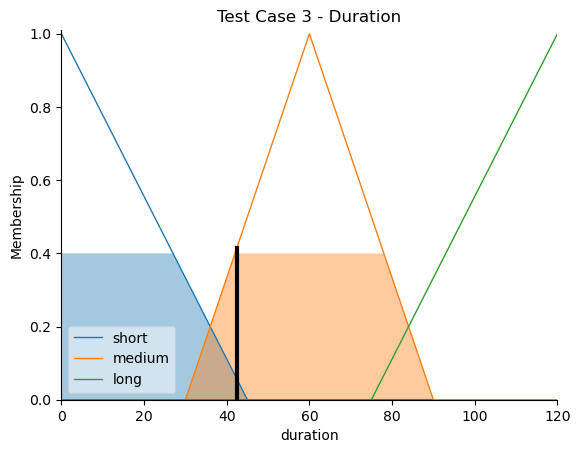


=================== Test Case 4: Case 3: Intermediate, Medium Energy, Weight Loss, Middle-aged, Overweight ===================
Inputs:
  fitness_level: 55
  energy_level: 50
  goal: 0
  age: 50
  weight_status: 90

Outputs:
  Recommended Intensity: 54.74 / 100%
  Recommended Duration: 64.31 / 120 minutes


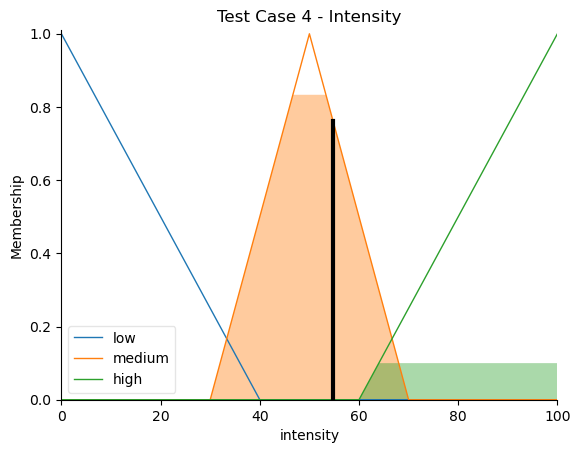

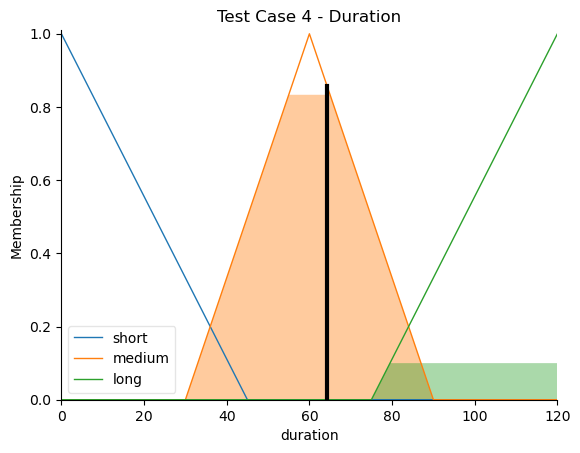


=================== Test Case 5: Case 4: Beginner, High Energy, General, Middle-aged, Underweight ===================
Inputs:
  fitness_level: 20
  energy_level: 80
  goal: 50
  age: 40
  weight_status: 20

Outputs:
  Recommended Intensity: 32.38 / 100%
  Recommended Duration: 41.61 / 120 minutes


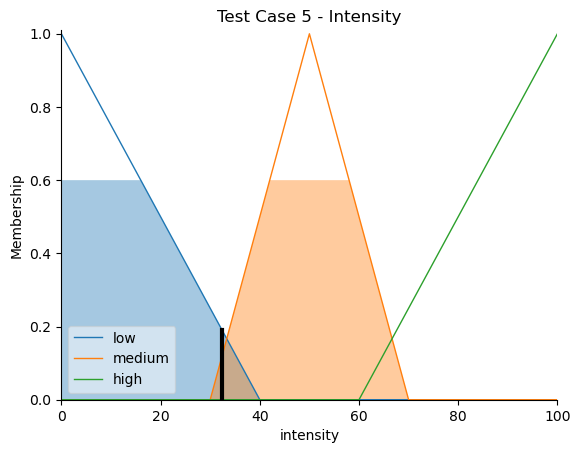

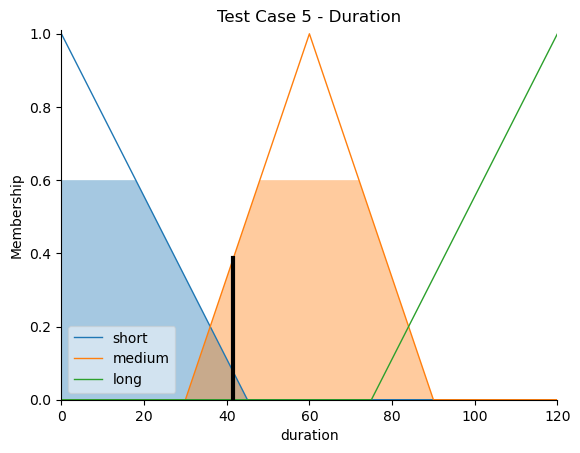


=================== Test Case 6: Case 6: Intermediate, Low Energy, General, Old, Normal ===================
Inputs:
  fitness_level: 50
  energy_level: 25
  goal: 50
  age: 75
  weight_status: 55

Outputs:
  Recommended Intensity: 32.54 / 100%
  Recommended Duration: 44.95 / 120 minutes


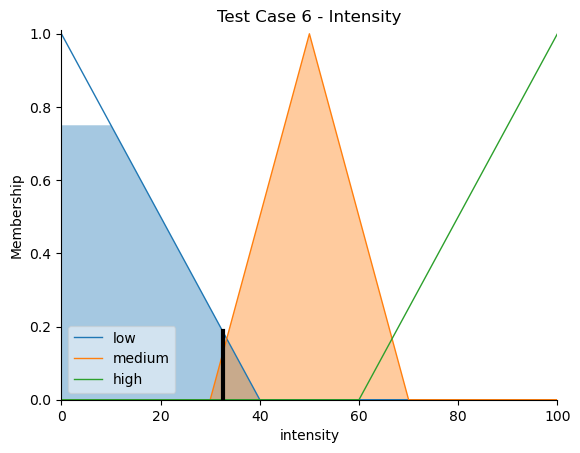

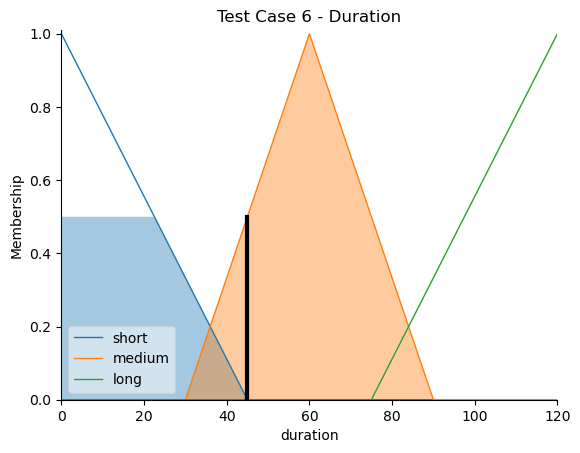


=================== Test Case 7: Case 6: Intermediate, High Energy, Muscle Gain, Old, Normal ===================
Inputs:
  fitness_level: 60
  energy_level: 80
  goal: 80
  age: 65
  weight_status: 70

Outputs:
  Recommended Intensity: 59.40 / 100%
  Recommended Duration: 58.15 / 120 minutes


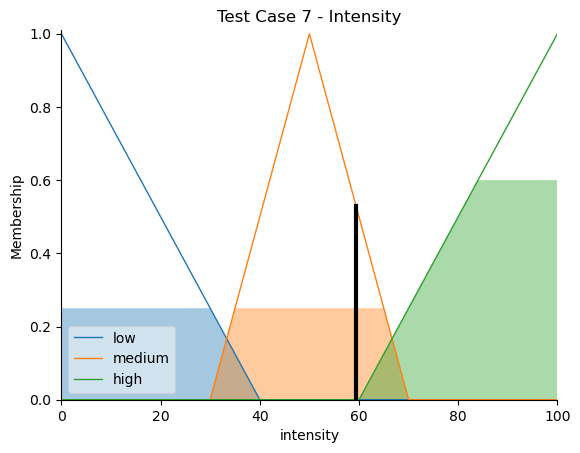

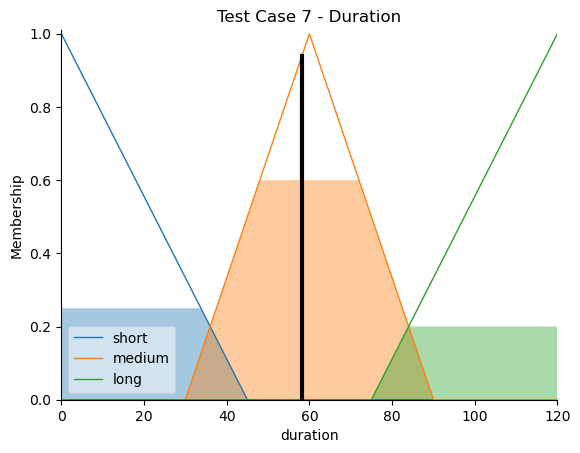

--- All Test Cases Completed ---


In [13]:
print("Multiple Test Cases for Validation")

# Loop through each test case
for i, case in enumerate(test_cases):
    print(f"\n=================== Test Case {i + 1}: {case['name']} ===================")
    print("Inputs:")
    inputs = case['inputs']
    for key, value in inputs.items():
        print(f"  {key}: {value}")

    # Feed inputs to the simulation
    try:
        for key, value in inputs.items():
            exercise_simulation.input[key] = value

        # Compute the results
        exercise_simulation.compute()

        # Get output values
        recommended_intensity = exercise_simulation.output['intensity']
        recommended_duration = exercise_simulation.output['duration']

        print("\nOutputs:")
        print(f"  Recommended Intensity: {recommended_intensity:.2f} / 100%")
        print(f"  Recommended Duration: {recommended_duration:.2f} / 120 minutes")

        # -- Visualize --
        
        # following code will show two plots for each test case.
        intensity.view(sim=exercise_simulation)
        plt.title(f"Test Case {i + 1} - Intensity")
        plt.show()

        duration.view(sim=exercise_simulation)
        plt.title(f"Test Case {i + 1} - Duration")
        plt.show()

    except Exception as e:
        print(f"Error processing Test Case {i + 1}")
        print(f"Error message: {e}")
        
print("--- All Test Cases Completed ---")